In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve, accuracy_score

def calculate_precision_recall(df):
    # 将标签和得分转换为 numpy 数组
    labels = df['label'].astype(int).to_numpy()
    scores = df['score'].to_numpy()
    
    # 计算 precision-recall 曲线
    precision, recall, thresholds = precision_recall_curve(labels, scores)
    
    # 将结果合并为一个矩阵
    pr_matrix = np.vstack((thresholds, precision[:-1], recall[:-1])).T
    
    # 转换为 DataFrame 以便于查看
    pr_df = pd.DataFrame(pr_matrix, columns=['Threshold', 'Precision', 'Recall'])
    
    return pr_df, precision, recall
  
def calculate_metrics(df, num_thresholds=100):
    # 将标签和得分转换为 numpy 数组
    labels = df['label'].astype(int).to_numpy()
    scores = df['score'].to_numpy()
    
    # 计算 precision-recall 曲线
    precision, recall, thresholds = precision_recall_curve(labels, scores)
    
    # 初始化 lists 保存不同阈值下的准确率
    accuracy = []
    
    # 对阈值进行下采样
    thresholds_sampled = np.linspace(thresholds.min(), thresholds.max(), num_thresholds)
    
    for threshold in thresholds_sampled:
        predicted = scores >= threshold
        acc = accuracy_score(labels, predicted)
        accuracy.append(acc)
    
    precision_sampled = np.interp(thresholds_sampled, thresholds, precision[:-1])
    recall_sampled = np.interp(thresholds_sampled, thresholds, recall[:-1])
    
    return thresholds_sampled, precision_sampled, recall_sampled, accuracy


def plot_precision_recall(precision, recall):
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

def plot_anomalies(df, threshold):
    # 预测异常
    df['predicted'] = df['score'] >= threshold
    # 绘图
    plt.figure(figsize=(20, 8))
    true_anomalies = df[df['label']]['idx'].tolist()
    # plt.scatter(df['idx'], df['score'], c=df['label'], cmap='coolwarm', label='True Labels', edgecolor='k', s=10)
    for idx in true_anomalies:
        plt.axvline(x=idx, color='r', linestyle='--', linewidth=0.03)
    # 绘制折线图
    plt.plot(df['idx'], df['score'], color='black', label='Score Curve',linewidth=0.5)
    # 绘制预测的异常点
    plt.scatter(df['idx'], df['score'], c=df['predicted'], marker='x', label='Predicted Labels', s=0.1)
    # 绘制阈值线
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
    plt.xlabel('Index')
    plt.ylabel('Score')
    plt.title('Anomalies and Predicted Anomalies')
    plt.legend()
    plt.show()
    

def plot_metrics(thresholds, precision, recall, accuracy):
    plt.figure(figsize=(20, 4))
    plt.plot(thresholds, precision, marker='.', label='Precision')
    plt.plot(thresholds, recall, marker='.', label='Recall')
    plt.plot(thresholds, accuracy, marker='.', label='Accuracy')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and Accuracy vs. Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

       Threshold  Precision  Recall
0       0.000074   0.076872     1.0
1       0.000074   0.076874     1.0
2       0.000075   0.076875     1.0
3       0.000076   0.076877     1.0
4       0.000077   0.076878     1.0
...          ...        ...     ...
48198   0.086285   0.000000     0.0
48199   0.086928   0.000000     0.0
48200   0.087033   0.000000     0.0
48201   0.087224   0.000000     0.0
48202   0.087379   0.000000     0.0

[48203 rows x 3 columns]


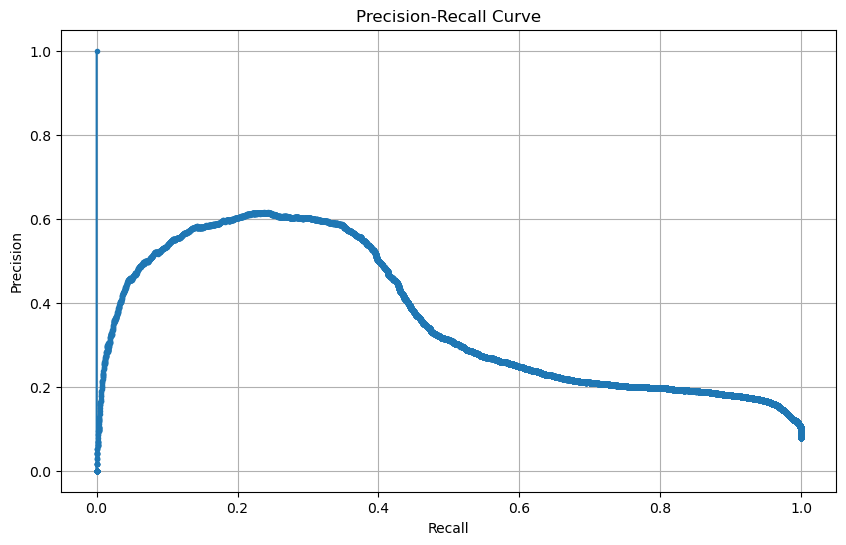

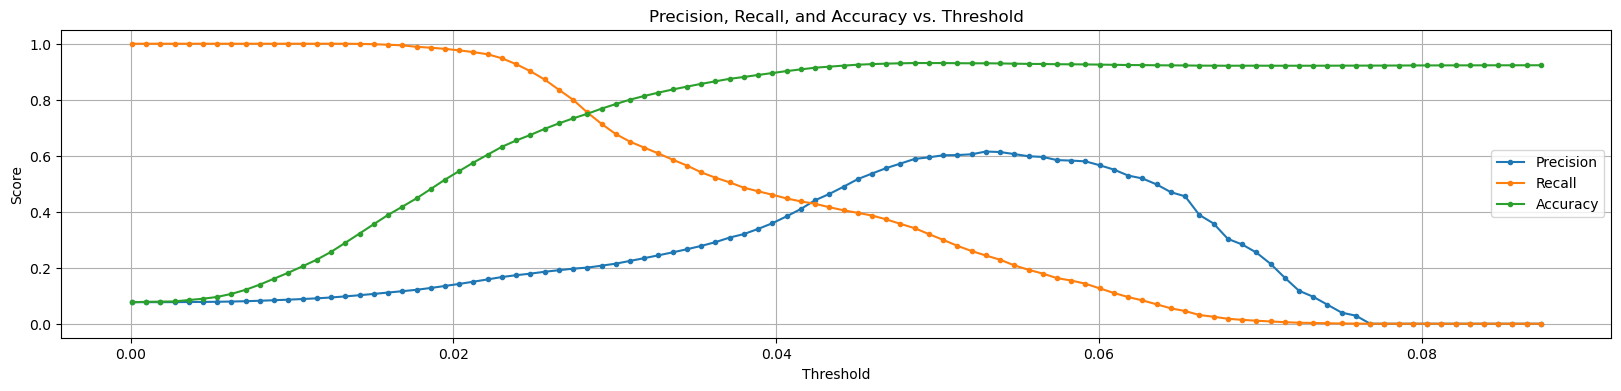

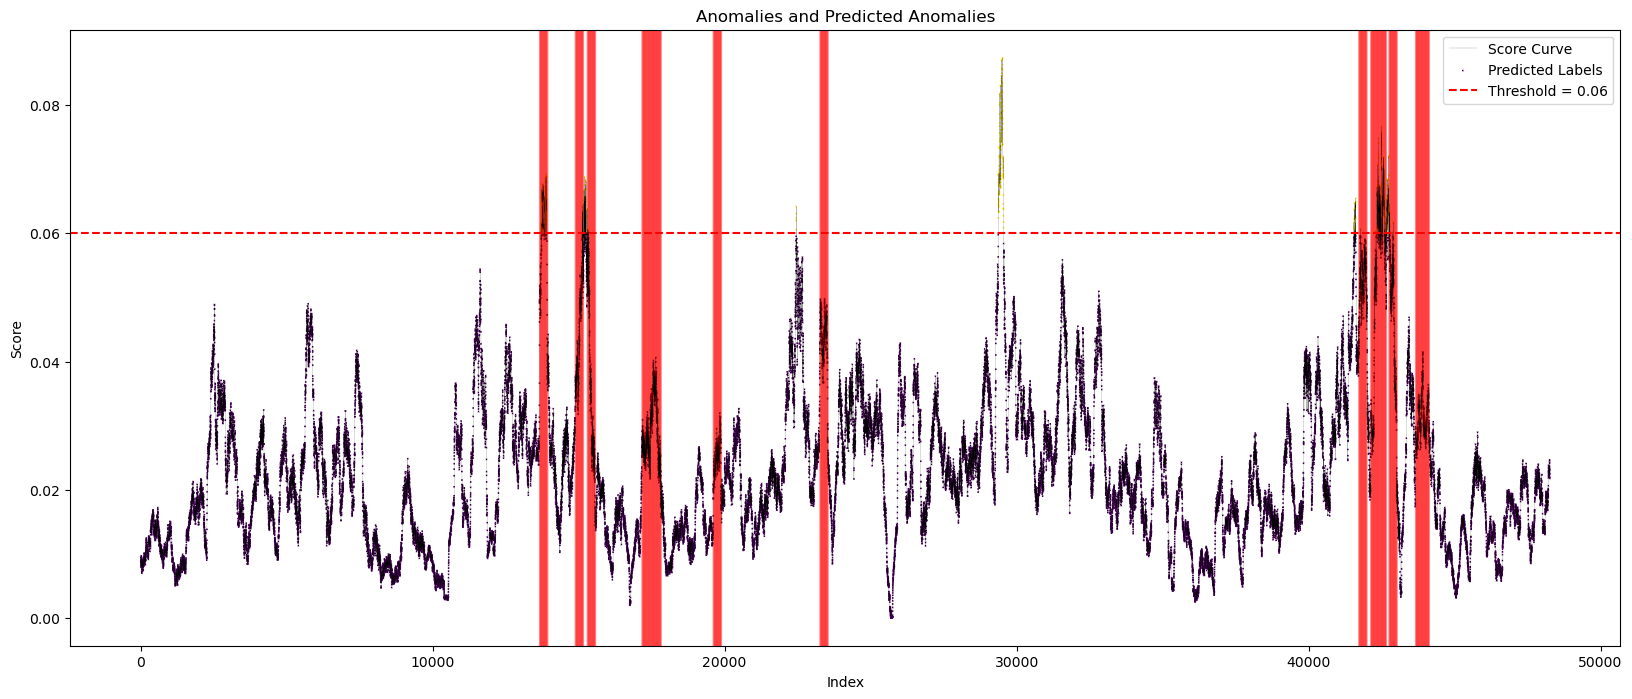

In [46]:
    
data = pd.read_csv('score_frame.csv')
data = data[["idx", "score","label"]]
data.head()
data.sort_values("idx", inplace=True)
# 示例使用
pr_df, precision, recall = calculate_precision_recall(data)
print(pr_df)
pr_df.to_csv('pr_df.csv', index=False)
# 绘制 Precision-Recall 曲线
plot_precision_recall(precision, recall)
# 计算指标
thresholds, precision, recall, accuracy = calculate_metrics(data)

# 绘制指标图
plot_metrics(thresholds, precision, recall, accuracy)
# 绘制异常点
threshold = 0.06
plot_anomalies(data, threshold)